Aluno: Felipe Miranda Cardoso de Sá
<br>Matrícula: 201802677
<br> PDI - Processamento Digital de Imagens
<br> Professor: Cassio Denner

**Carregando imagens do Drive**

In [1]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import math
import time

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
keth = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/new_keth.jpeg", cv2.IMREAD_GRAYSCALE)
lena = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/lena.png", cv2.IMREAD_GRAYSCALE)

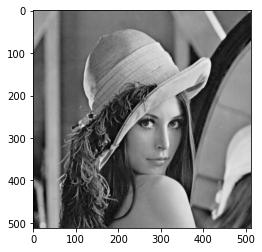

In [4]:
plt.figure(0)
#plt.imshow(keth, cmap='gray')
plt.imshow(lena, cmap='gray')

In [5]:
img = lena
W, H = img.shape
print(f'Dimensões: {img.shape}')
print(f'Tipo-Dados: {img.dtype}')
print(f'Pixels: {W*H}')
print(f'Tamanho: {W*H/1024}')
print(f'Tam. Obj. : {sys.getsizeof(img)/1024}')

Dimensões: (512, 512)
Tipo-Dados: uint8
Pixels: 262144
Tamanho: 256.0
Tam. Obj. : 256.1171875


**Definindo o filtro**

In [6]:
filtro = [
          [0.075, 0.125, 0.075],
          [0.125, 0.200, 0.075],
          [0.075, 0.125, 0.075]
         ]

**Filtro espaciais lineares de tamanho arbitrário**

In [7]:
def filtro_media_ponderada(img, filtro):
  W, H = img.shape

  new_img = img.copy() 

  K = int(math.floor(len(filtro[0]) / 2))
  L = int(math.floor(len(filtro) / 2))

  s = 1 / np.sum(filtro) #sum of filters coefficients

  for v in range(L, H - L):               # H - L - 1 (+1) 
    for u in range(K, W - K):             # W - K - 1 (+1)
                                      
      img_sum = 0
      for j in range(-L, L+1):            #[-L, ... , L]  
                    
        for i in range(-K, K+1):          #[-K, ... , K]
                 
          p = img[u+i, v+j]             #get pixel
          c = filtro[j+L-1][i+K-1]
          img_sum += (c * p)

      q = round(img_sum * s)

      #clampping
      if q < 0: q = 0
      elif q > 255: q = 255

      new_img[u, v] = q

  return new_img

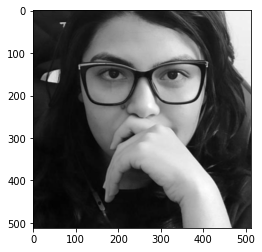

In [8]:
keth_filtrada = filtro_media_ponderada(keth, filtro)

plt.figure(0)

plt.imshow(keth_filtrada, cmap='gray')

Notamos diferenças em uma amostra arbitrária da imagem antes e depois da aplicação do filtro

In [9]:
print(keth[125][:125:10])
print(keth_filtrada[125][:125:10])

[16 13 19 27 28 29 28 19 25 20 20 13  0]
[16 13 21 27 30 29 28 19 24 20 20 17 50]


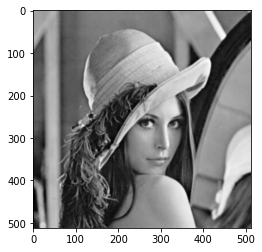

In [10]:
lena_filtrada = filtro_media_ponderada(lena, filtro)

plt.figure(0)

plt.imshow(lena_filtrada, cmap='gray')

In [11]:
print(lena[125][:125:10])
print(lena_filtrada[125][:125:10])

[ 97  95  90 138 170 165 120  81  96 100  97 107 106]
[ 97  93  90 136 168 165 120  77  96 101 101 110 110]


In [12]:
def filtro_media_simples(img):
  W, H = img.shape

  filtro = np.ones((3, 3))
  
  new_img = img.copy() 

  K = int(np.floor(len(filtro[0]) / 2))
  L = int(np.floor(len(filtro) / 2))

  s = 1 / (len(filtro) * len(filtro[0])) #sum of filters coefficients

  for v in range(L, H - L):               # H - L - 1 (+1) 
    for u in range(K, W - K):             # W - K - 1 (+1)
                                      
      img_sum = 0
      for j in range(-L, L+1):            #[-L, ... , L]  
                    
        for i in range(-K, K+1):          #[-K, ... , K]
                 
          p = img[u+i, v+j]             #get pixel
          c = filtro[j+L][i+K]
          img_sum += (c * p)

      q = np.round(img_sum * s)

      #clampping
      if q < 0: q = 0
      elif q > 255: q = 255

      new_img[u, v] = q

  return new_img

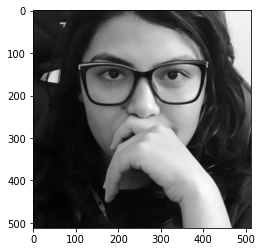

In [13]:
plt.figure(0)

plt.imshow(filtro_media_simples(keth), cmap='gray')

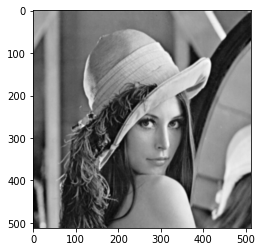

In [14]:
plt.figure(0)

plt.imshow(filtro_media_simples(lena), cmap='gray')

In [15]:
filtro = np.array([
          [0, 0, -1, 0, 0],
          [0, -1, -2, -1, 0],
          [-1, -2, -16, -2, -1],
          [0, -1, -2, -1, 0],
          [0, 0, -1, 0, 0]
         ])
filtro

array([[  0,   0,  -1,   0,   0],
       [  0,  -1,  -2,  -1,   0],
       [ -1,  -2, -16,  -2,  -1],
       [  0,  -1,  -2,  -1,   0],
       [  0,   0,  -1,   0,   0]])

In [20]:
filtro = np.array([
          [0, 1, 2, 1, 0],
          [1, 3, 5, 3, 1],
          [2, 5, 9, 5, 2],
          [1, 3, 5, 3, 1],
          [0, 1, 2, 1, 0]
         ])
filtro

array([[0, 1, 2, 1, 0],
       [1, 3, 5, 3, 1],
       [2, 5, 9, 5, 2],
       [1, 3, 5, 3, 1],
       [0, 1, 2, 1, 0]])

In [17]:
from numpy import round, floor, divide, multiply, add, dot

In [21]:
def filtro_media_ponderada_numpy(img, filtro):
  #filtro = np.array(filtro)
  W, H = img.shape

  new_img = img.copy() 

  K = int(floor(divide(len(filtro[0]), 2)))
  L = int(floor(divide(len(filtro), 2)))

  s = divide(1, filtro.sum()) #sum of filters coefficients

  for v in range(L, H - L):               # H - L - 1 (+1) 
    for u in range(K, W - K):             # W - K - 1 (+1)
                                      
      img_sum = 0
      for j in range(-L, L+1):            #[-L, ... , L]  
                    
        for i in range(-K, K+1):          #[-K, ... , K]
                 
          p = img[u+i, v+j]             #get pixel
          c = filtro[j+L-1][i+K-1]
          img_sum = add(img_sum, dot(c,p))

      q = round(dot(img_sum, s))

      #clampping
      if q < 0: q = 0
      elif q > 255: q = 255

      new_img[u, v] = q

  return new_img

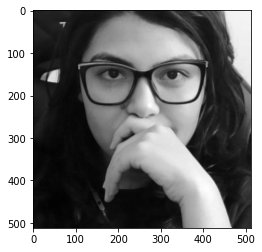

In [22]:
keth_filtrada = filtro_media_ponderada_numpy(keth, filtro)

plt.figure(0)

plt.imshow(keth_filtrada, cmap='gray')

In [23]:
filtro_np = np.array(filtro, np.uint8)
filtro_np

array([[0, 1, 2, 1, 0],
       [1, 3, 5, 3, 1],
       [2, 5, 9, 5, 2],
       [1, 3, 5, 3, 1],
       [0, 1, 2, 1, 0]], dtype=uint8)

In [25]:
nptime = []

for i in range(1):
  initial_time = time.time()
  filtro_media_ponderada_numpy(lena, filtro_np)
  final_time = time.time()
  time_delta = final_time - initial_time
  nptime.append(time_delta)

#print(initial_time)
#print(final_time)
print(nptime[-1])

55.86426782608032


In [27]:
pytime = []

for i in range(1):
  initial_time = time.time()
  filtro_media_ponderada(lena, filtro)
  final_time = time.time()
  time_delta = final_time - initial_time
  pytime.append(time_delta)

#print(initial_time)
#print(final_time)
print(pytime[-1])

8.396309852600098


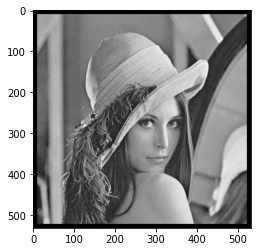

In [37]:
image = cv2.copyMakeBorder(lena, 10,10,10,10, cv2.BORDER_CONSTANT)
plt.imshow(image, cmap='gray')

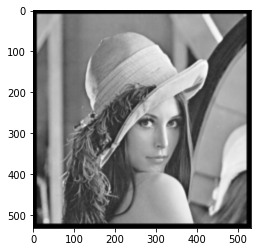

In [36]:
image = cv2.copyMakeBorder(lena, 10,10,10,10, cv2.BORDER_CONSTANT)
image = filtro_media_ponderada(image, filtro)
plt.imshow(image, cmap='gray')

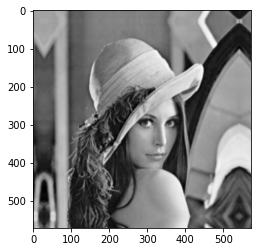

In [38]:
image = cv2.copyMakeBorder(lena, 30,30,30,30, cv2.BORDER_REFLECT)
image = filtro_media_ponderada(image, filtro)
plt.imshow(image, cmap='gray')